In [1]:
from IPython.display import display, Markdown
from ipywidgets import interact

from sklearn import datasets
from scipy.spatial import distance_matrix
import numpy as np

from utils import draw, draw_few, hex_from_index, colored_text

## set the number of classes `L` and sample size `N`:

In [2]:
L = 5
N = 200
T = 50

## generate sample dataset `X`:

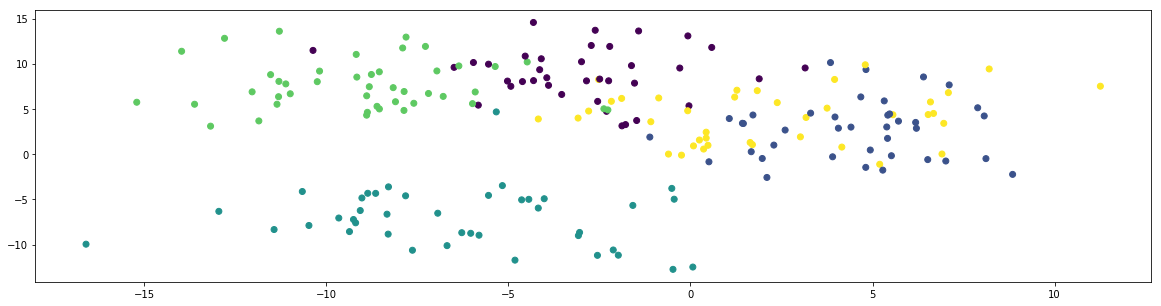

In [3]:
X, classes = datasets.make_blobs(
    n_samples=N + T,
    n_features=2,
    centers=L,
    cluster_std=3.0,
    shuffle=True,
    random_state=42
)
X, TEST_X = X[:N], X[N:]
classes, test_y = classes[:N], classes[N:]

draw(X, classes)
print()

## split `X` into 2 parts (parametric `XP` and train `XT`):

classes: [0, 1, 2, 3, 4]
train:	 [17, 21, 22, 19, 21]
param:	 [20, 18, 19, 25, 18]


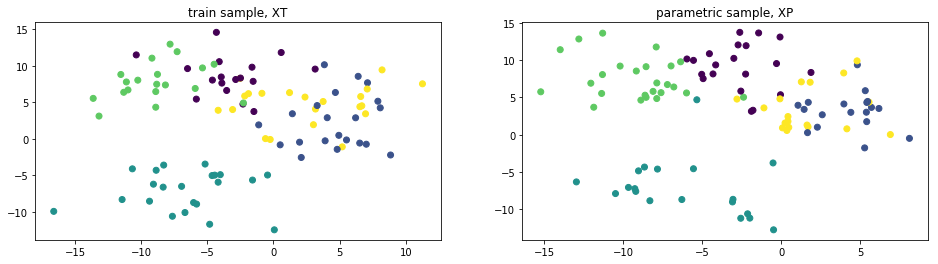

In [4]:
median = int(N/2)
XT, XP = X[:median], X[median:]
yt, yp = classes[:median], classes[median:]
n, m = len(XT), len(XP)

ni = [list(yt).count(i) for i in range(L)]
mi = [list(yp).count(i) for i in range(L)]
print('classes:', [i for i in range(L)])
print('train:\t', ni)
print('param:\t', mi)

if 0 in ni or 0 in mi:
    raise ValueError('Bad split: one or more classes are not represented in the samples')

draw_few([(XT, yt, 'train sample, XT'), (XP, yp, 'parametric sample, XP')])

## training:

quality: 71.0%


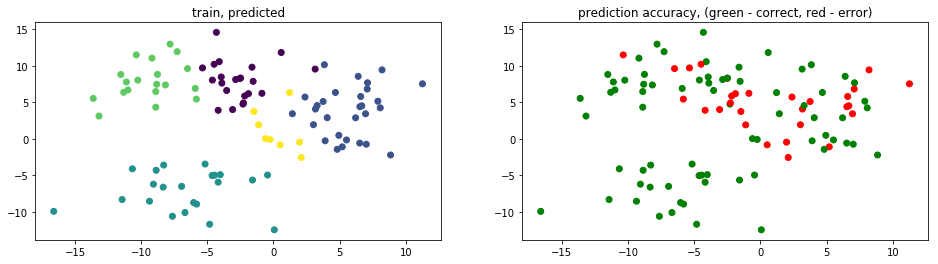

In [5]:
D = distance_matrix(XT, XP, p = 0.2)
B = np.zeros((n, L))

for row in range(n):
    for cls in range(L):
        B[row][cls] = D[row][yp == cls].mean()
        
predicted_classes = B.argmin(axis=1)
quality = (yt == predicted_classes).mean()
print('quality: {}%'.format(quality * 100))
test_colors = list(map(lambda res: 'g' if res else 'r', yt == predicted_classes))
draw_few([
    (XT, predicted_classes, 'train, predicted'), 
    (XT, test_colors, 'prediction accuracy, (green - correct, red - error)')
])

## recognition test:

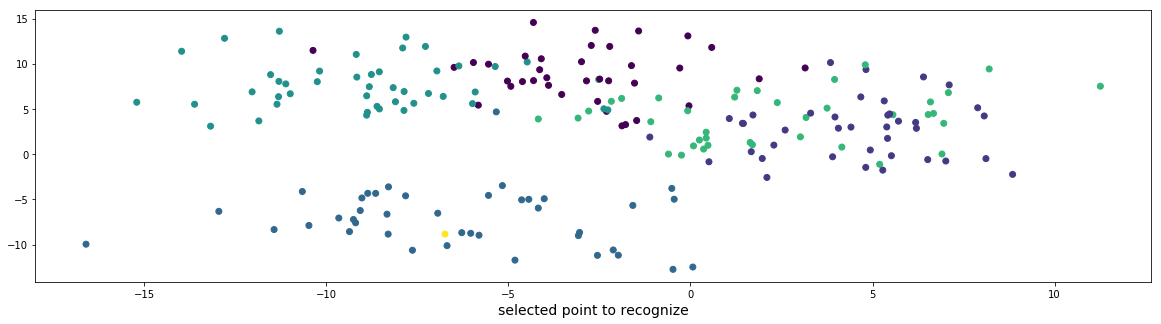

Point classified as <font color=#2a788e><strong>class #2</strong></font> and in fact belongs to <font color=#2a788e><strong>class #2</strong></font>

In [7]:
def test(point):
    x, cl = point
    p = draw(np.concatenate((X, [x])), list(classes) + [L + 1], 'selected point to recognize')
    d = distance_matrix([x], XP, p = 0.2)[0]
    b = [d[yp == cls].mean() for cls in range(L)]
    predict = np.argmin(b)
    
    predict_class = colored_text('class #{}'.format(predict) , hex_from_index(p, predict, L))
    origin_class = colored_text('class #{}'.format(cl) , hex_from_index(p, cl, L))
    display(Markdown('Point classified as {} and in fact belongs to {}'.format(predict_class, origin_class)))
    

options = dict()
for (x, y), cl in zip(TEST_X, test_y):
    label = '({:.3f}, {:.3f})'.format(x, y)
    options[label] = (x, y), cl
    
interact(test, point=options)
print()